# Reducción de dimensionalidad

Una de las prácticas más comunes de procesamiento de datos es la reducción de la
dimensional, lo cual ayuda a transformar o seleccionar las características que mejor
representan la estructura, y que por tanto, son más adecuadas para el
aprendizaje.

## Reducción de la Dimensionalidad No supervisada

Si el número de características es alto, puede ser útil `reducirlas` mediante
una fase no supervisada.

### Principal Components Analysis **(PCA)**

Descomponer un *dataset* multivariante en un conjunto de componentes ortogonales
que explica la cantidad de varianza.

In [12]:
from sklearn import preprocessing, datasets, decomposition

#Load the iris dataset and scale it
X_iris, y_iris = datasets.load_iris(return_X_y=True)

scaler = preprocessing.StandardScaler().fit(X_iris)
X_scaled = scaler.transform(X_iris)

Aplico el PCA:

In [13]:
#Apply principal componentes analysis to reduce the iris number of features from 4 to 3
pca = decomposition.PCA(n_components=3)
X_reduced = pca.fit_transform(X_scaled)
print(X_scaled[:3,:])
print("Con menos dimensión")
print(X_reduced[:3,:])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]]
Con menos dimensión
[[-2.26470281  0.4800266   0.12770602]
 [-2.08096115 -0.67413356  0.23460885]
 [-2.36422905 -0.34190802 -0.04420148]]


## Aglomeración

Esta técnica hace clusters de forma jerárquica y va agrupando características
que se comportan de forma similar.

In [14]:
import numpy as np
from sklearn import cluster

#Build a FeatureAgglomeration object and transform the iris dataset for it to have 3 features
agglo = cluster.FeatureAgglomeration(n_clusters=3,
                                     pooling_func=np.mean, linkage="ward")
X_reduced2 = agglo.fit_transform(X_scaled)
print(X_scaled[:3,:])
print("Con menos dimensión")
print(X_reduced2[:3,:])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]]
Con menos dimensión
[[-1.32783541  1.01900435 -0.90068117]
 [-1.32783541 -0.13197948 -1.14301691]
 [-1.35625412  0.32841405 -1.38535265]]


In [15]:
#| echo: false
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

Visualizando en 2D el original:

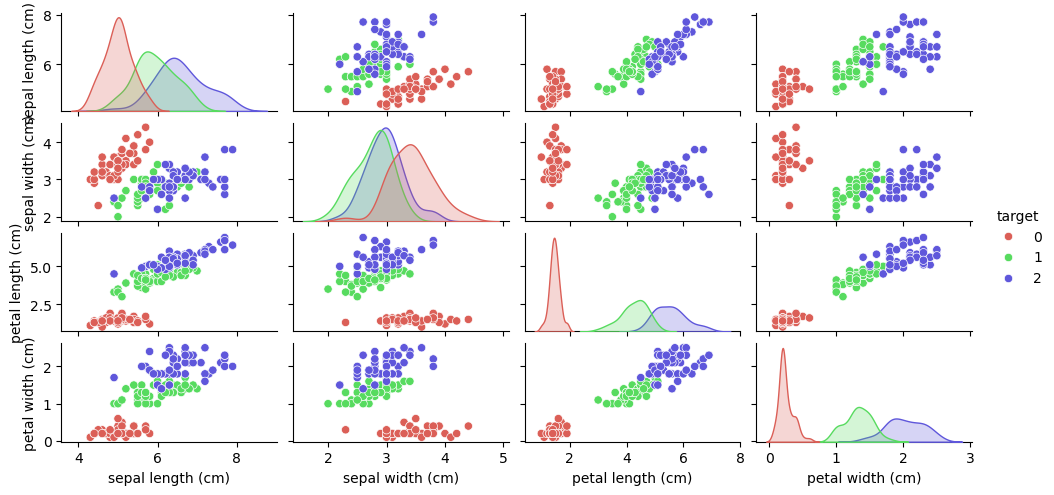

In [16]:
#Plot the iris dataset in a 2D pairplot
iris = datasets.load_iris(as_frame=True)
palette = sns.color_palette("hls", 3)
g = sns.pairplot(iris.frame, hue="target", palette=palette,
                 height=1.25, aspect=2)
plt.show()

Visualizando en 2D el PCA:

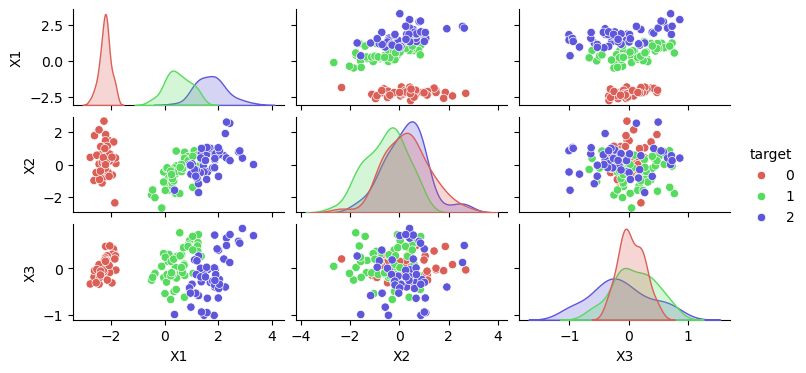

In [17]:
df = pd.DataFrame(X_reduced, columns=["X1", "X2", "X3"])
#Plot the iris dataset in a 2D pairplot
df["target"] = iris.frame["target"]
g = sns.pairplot(df, hue="target", palette=sns.color_palette("hls", 3),
                 height=1.25, aspect=2)
plt.show()

Visualizando en 2D la reducción mediante Aglomeración:

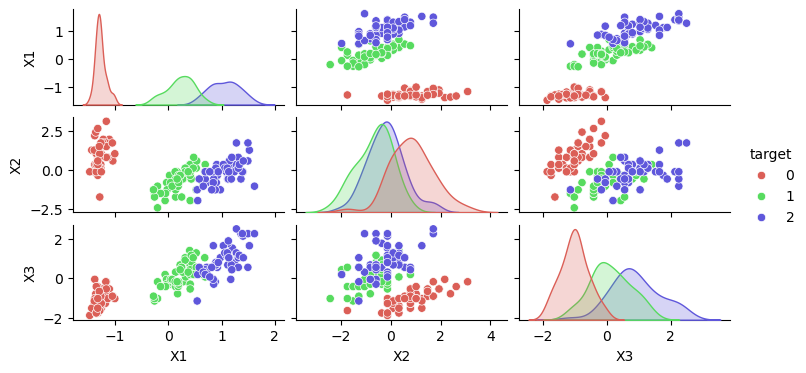

In [18]:
df = pd.DataFrame(X_reduced2, columns=["X1", "X2", "X3"])
#Plot the iris dataset in a 2D pairplot
df["target"] = iris.frame["target"]
g = sns.pairplot(df, hue="target", palette=sns.color_palette("hls", 3),
                 height=1.25, aspect=2)
plt.show()

## Local Lineal Embedding

In [19]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=3)
X_reduced3 = lle.fit_transform(X_scaled)
print(X_scaled[:3,:])
print("Con menos dimensión")
print(X_reduced3[:3,:])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]]
Con menos dimensión
[[-0.09945979 -0.00099106  0.00034675]
 [-0.09945979 -0.00093402  0.00030145]
 [-0.09945979 -0.000931    0.00029906]]


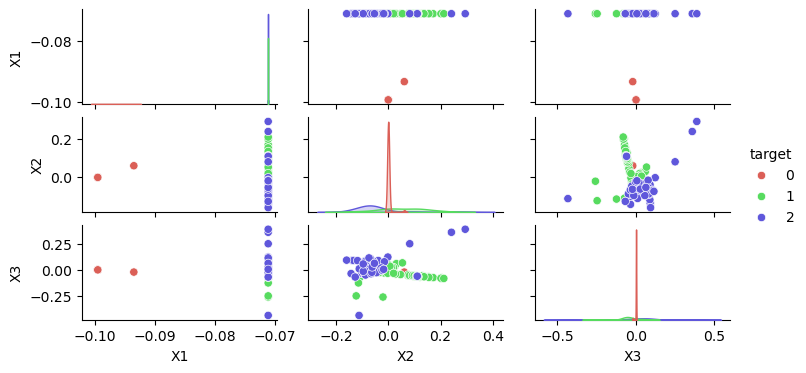

In [20]:
df = pd.DataFrame(X_reduced3, columns=["X1", "X2", "X3"])
#Plot the iris dataset in a 2D pairplot
df["target"] = iris.frame["target"]
g = sns.pairplot(df, hue="target", palette=sns.color_palette("hls", 3),
                 height=1.25, aspect=2)
plt.show()

## Autoencoders para reducción de dimensionalidad

Supondremos datos numéricos, ya que es la entrada que aceptan las neuronas de entrada de la red.

Utilizaremos Pytorch para implementar un autoencoder de forma simple.

Epoch [10/50], Loss: 0.8254
Epoch [20/50], Loss: 0.5278
Epoch [30/50], Loss: 0.3391
Epoch [40/50], Loss: 0.2800
Epoch [50/50], Loss: 0.2662


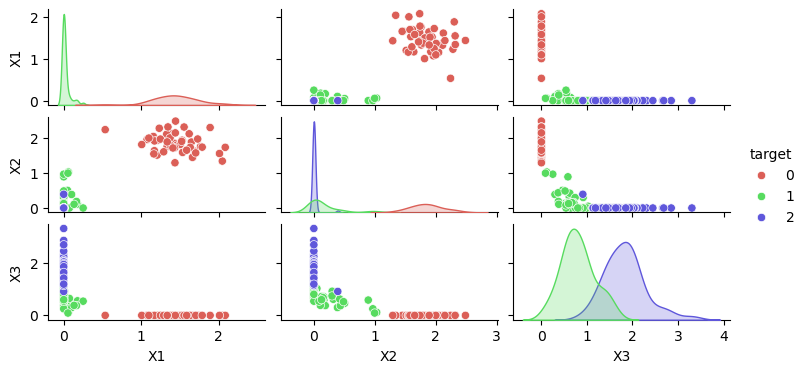

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim

# Convertir los datos escalados a tensores de PyTorch
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)

# Definir el autoencoder en PyTorch
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Capa de codificación
        self.encoder = nn.Sequential(
            nn.Linear(4, 3),  # Reduce de 4 a 3 dimensiones
            nn.ReLU()
        )
        # Capa de decodificación
        self.decoder = nn.Sequential(
            nn.Linear(3, 4)  # Reconstruye de vuelta a 4 dimensiones
        )
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Inicializar el modelo, el criterio de pérdida y el optimizador
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Entrenar el autoencoder
num_epochs = 50
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, X_tensor)
    
    # Backward pass y optimización
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Imprimir la pérdida cada 10 épocas
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Obtener la codificación de los datos usando el encoder entrenado
with torch.no_grad():
    X_encoded = model.encoder(X_tensor).numpy()

# Crear un DataFrame con los datos reducidos a 3 dimensiones
df = pd.DataFrame(X_encoded, columns=["X1", "X2", "X3"])

# Agregar la columna de etiquetas
df["target"] = iris.frame["target"]

# Graficar el conjunto de datos Iris en un pairplot 2D
g = sns.pairplot(df, hue="target", palette=sns.color_palette("hls", 3),
                 height=1.25, aspect=2)
plt.show()

# Selección de Características

## Selección de Características

En este caso se reducen las características eligiendo las características que
permitirían un mejor desempeño del clasificador.

## Eliminar características con menor varianza

Es un modelo muy simple. Borra todas las características cuya varianza no cumpla
un umbral.

Por defecto borra las que tengan 0 varianza.

In [22]:
# Load the iris dataset and plt the variance for each feature
iris = datasets.load_iris(as_frame=True)
X_iris = iris.data
y_iris = iris.target
X_iris.var()

sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64

In [23]:
from sklearn.feature_selection import VarianceThreshold

#Build a variance threshold selector and transform the iris dataet for it to have three features
sel = VarianceThreshold(threshold=0.2)
X_reduced3 = sel.fit_transform(X_iris)
print(X_reduced3.shape)
print(X_iris.iloc[:3,:])
print("Tras reducir")
print(X_reduced3[:3,:])

(150, 3)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
Tras reducir
[[5.1 1.4 0.2]
 [4.9 1.4 0.2]
 [4.7 1.3 0.2]]


## Midiendo la correlación

La matriz de correlación permite mostrar atributos que pueden ser *redundantes*:

In [24]:
print(X_iris.corr())

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


Yellowbrick nos permite visualizarlo:

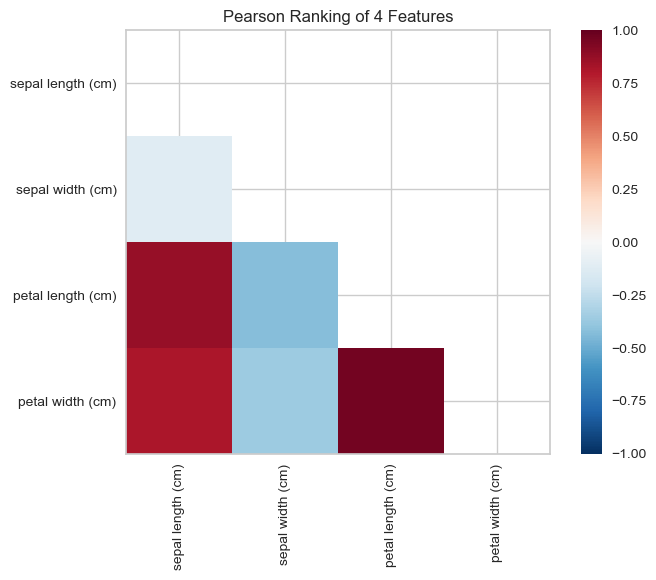

<Axes: title={'center': 'Pearson Ranking of 4 Features'}>

In [25]:
from yellowbrick.features import Rank1D, Rank2D
visualizer = Rank2D(algorithm='pearson').fit(X_iris, y_iris)
visualizer.transform(X_iris); visualizer.show()

## Aplicar la importancia según métrica

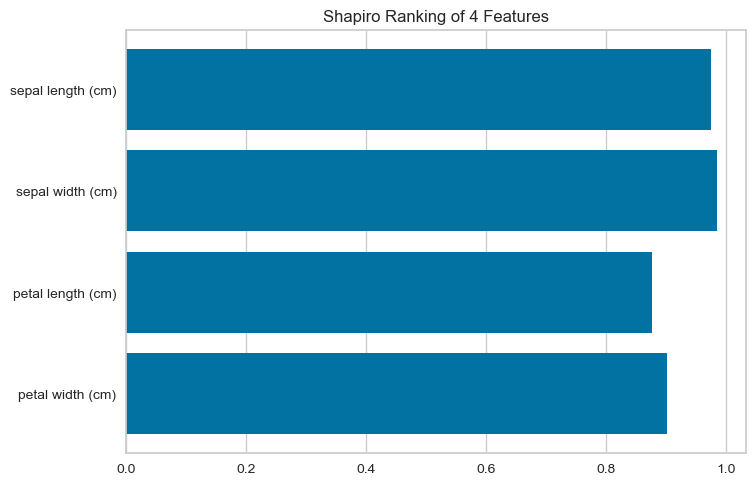

<Axes: title={'center': 'Shapiro Ranking of 4 Features'}>

In [26]:
from yellowbrick.features import Rank1D
visualizer = Rank1D(algorithm='shapiro')
visualizer.fit(X_iris, y_iris)
visualizer.transform(X_iris); visualizer.show()

## Selección Univariante

La selección de características univariante funciona seleccionando escogiendo
las mejores características según tests univariantes.

In [27]:
from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile
# Según el criterio chi-squared dustribution for it to have three features
sel = SelectKBest(chi2, k=3)
X_reduced4 = sel.fit_transform(X_iris, y_iris)
print(X_reduced4.shape)
print(X_iris.iloc[:3,:])
print("Tras reducir")
print(X_reduced4[:3,:])

(150, 3)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
Tras reducir
[[5.1 1.4 0.2]
 [4.9 1.4 0.2]
 [4.7 1.3 0.2]]


In [28]:
# Según un percentil
sel = SelectPercentile(chi2, percentile=50)
X_reduced5 = sel.fit_transform(X_iris, y_iris)
print(X_reduced5.shape)
print(X_iris.iloc[:3,:])
print("Tras reducir")
print(X_reduced5[:3,:])

(150, 2)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
Tras reducir
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]]


## Eliminación recursiva de características

Dado un estimador que asigna pesos a características, la eliminación recursiva,
*recursive feature elimination (RFE)* selecciona recursivamente menos y menos
características.

- Primero se entrena el estimador, y se mide la importancia de cada atributo.

- Las menos importantes son eliminadas del conjunto de características de forma
  recursiva hasta que se alcanza el número de características deseadas.


Vamos a aplicarlo hasta 2 características:

In [29]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

#Use a Support Vector Classifier as the base model for feature selection
svc = SVC(kernel="linear", C=1)
#Build a RFE model with the SVC to reduce the number of features of iris to 2
rfe = RFE(estimator=svc, n_features_to_select=2, step=1)
ranking = rfe.fit(X_iris, y_iris).ranking_
X_reduced_rfe = rfe.fit_transform(X_iris, y_iris)

print(ranking); print(X_reduced_rfe.shape)
print(X_iris.iloc[:3,:])
print("Reduced"); print(X_reduced_rfe[:3,:])

[3 2 1 1]
(150, 2)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
Reduced
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]]


Vamos a visualizarlo:

/var/folders/9v/xkgrjrbs4bb451f2mdx7b17w0000gp/T/ipykernel_15240/3197392943.py:3: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.relplot(data=df, x=df.columns[0], y=df.columns[1], hue="target", aspect=2,


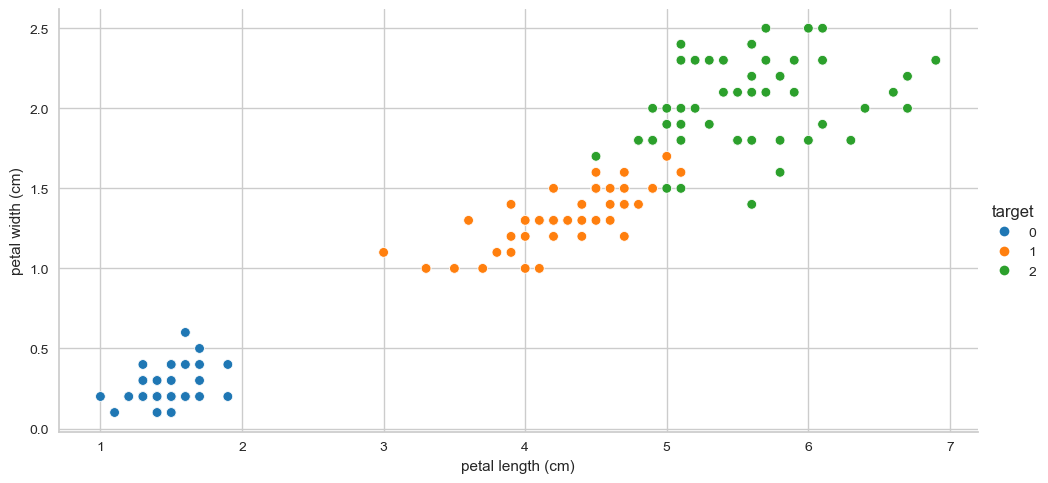

In [30]:
df = pd.DataFrame(X_reduced_rfe, columns=X_iris.columns[2:])
df["target"] = y_iris
sns.relplot(data=df, x=df.columns[0], y=df.columns[1], hue="target", aspect=2,
            palette=sns.color_palette("tab10")); plt.show()

Vamos a probar otro *dataset*:

In [31]:
#Code from sklearn documentation
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target
# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y);

Vamos a visualizar el ranking por pixel:

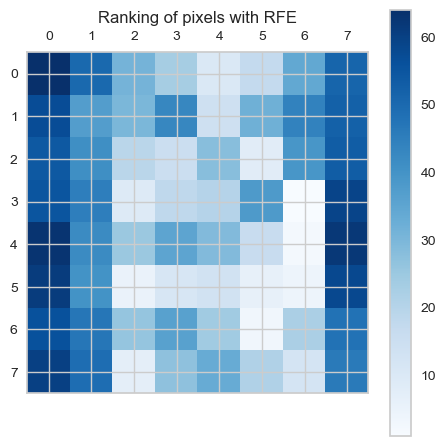

In [32]:
ranking = rfe.ranking_.reshape(digits.images[0].shape)
# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

## Selección de Características con SelectFromModel

`SelectFromModel` es un meta-transformador que puede usar cualquier estimador
que asigne importancia de los atributos:

- Si quedan por debajo de un umbral se eliminan.

- Se puede usar también `mean`, `median` y multiplicadores como `0.1*mean`.


In [33]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

#Use a LinearSVC as the base model for feature selection
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_iris, y_iris)
#Build a model-based selector with the lsvc to reduce the number of features of iris, preserving only thos avobe the average relevance
SFmodel = SelectFromModel(lsvc, prefit=True, threshold="1.25*mean")
X_reduced_model = SFmodel.transform(X_iris)
print(X_iris.iloc[:5,:])
print(X_reduced_model.shape)
print(X_reduced_model[:5,:])

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
(150, 2)
[[3.5 1.4]
 [3.  1.4]
 [3.2 1.3]
 [3.1 1.5]
 [3.6 1.4]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


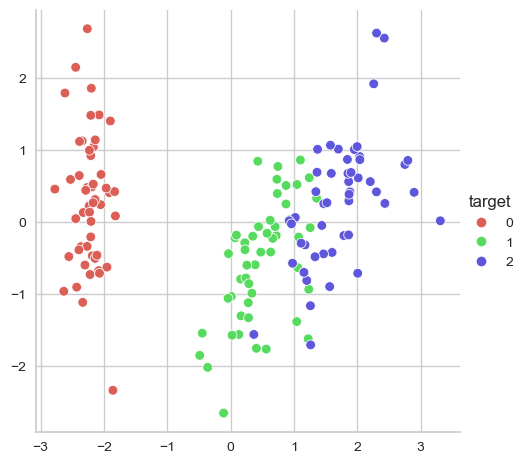

In [34]:
#Plot the reduced iris dataset
sns.relplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y_iris,
            palette=sns.color_palette("hls", 3))
plt.show()

Cambiamos el modelo:

In [35]:
from sklearn.ensemble import ExtraTreesClassifier
#now we do the same but using a tree classifier as the base model for feature selection
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X_iris, y_iris)
SFmodel = SelectFromModel(clf, prefit=True, threshold="1.25*mean")
X_reduced = SFmodel.transform(X_iris)

#We can use any model that computes the faeture importance a the base model
print(clf.feature_importances_)
print(X_reduced.shape)

[0.06719309 0.06286551 0.36129707 0.50864433]
(150, 2)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


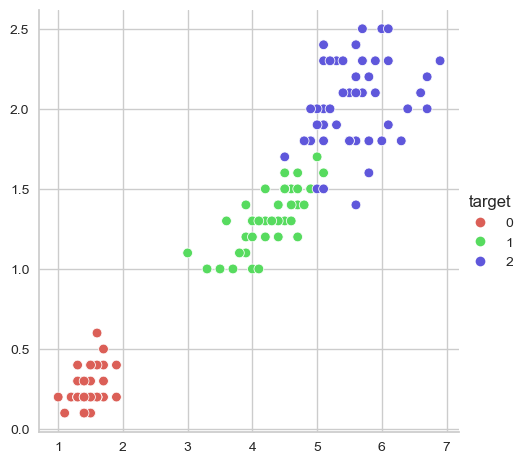

In [36]:
sns.relplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y_iris,
            palette=sns.color_palette("hls", 3))
plt.show()

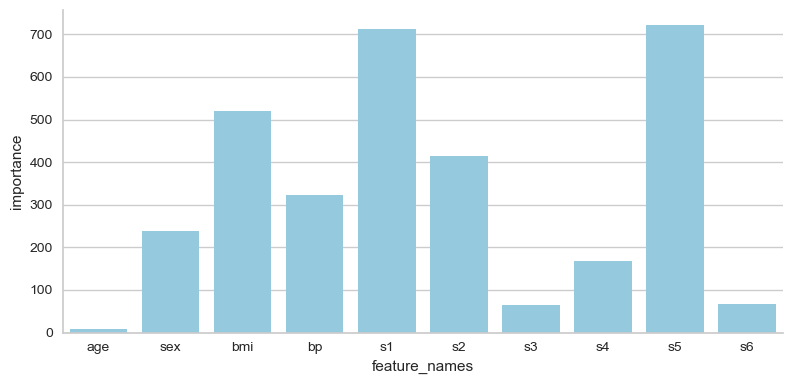

In [37]:
#We can do the same for the diabetes dataset
diabetes = datasets.load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X_diabetes, y_diabetes)
importance = np.abs(ridge.coef_)
df = pd.DataFrame({"feature_names": diabetes.feature_names, "importance": importance})
sns.catplot(x="feature_names", y="importance", data=df, kind="bar",
            errorbar=None, aspect=2, height=4, color="skyblue")
plt.show()

## Selección de Características Secuencial

La selección secuencial (*Forward-SFS*) busca iterativamente una nueva
característica a añadir a las ya seleccionadas. Empieza con cero características
y escoge aquella que maximiza aplicando CV usando un estimador (cualquiera le
vale, pero mejor que no sea lento) sobre una única característica.

Luego repite el procedimiento añadiendo una nueva característica cada vez, hasta
terminar con el número pedido de características.

## Backward-SFS

*Backward-SFS* sigue la misma idea, pero al revés, en vez de ir añadiendo va
eliminando características aplicando un estimador.

No dan los mismos resultado, ni son igualmente eficientes. Si tenemos 10
características y queremos siete será más eficiente *Backward-SFS* que
*Forward-SFS*.

`Scikit-learn` ofrece `SequentialFeatureSelector` que implementa ambos (
direction puede ser *forward* o *backward*).


Ejemplo:

In [38]:
from sklearn.feature_selection import SequentialFeatureSelector
import warnings
warnings.filterwarnings('ignore')

#Perform FORDWARD feature selection over the diabetes dataset to reduce it to 3 dimensions
sfs_forward = SequentialFeatureSelector(clf, n_features_to_select=3, direction="forward")
sfs_forward_fitted = sfs_forward.fit(X_diabetes, y_diabetes)

X_reduced_for = sfs_forward.transform(X_diabetes)
print(X_reduced_for.shape)
print(sfs_forward_fitted.get_support())
atribs = np.array(diabetes.feature_names)
print("Atributos elegidos")
print(atribs[sfs_forward_fitted.get_support()])

(442, 3)
[False  True False False  True False False  True False False]
Atributos elegidos
['sex' 's1' 's4']


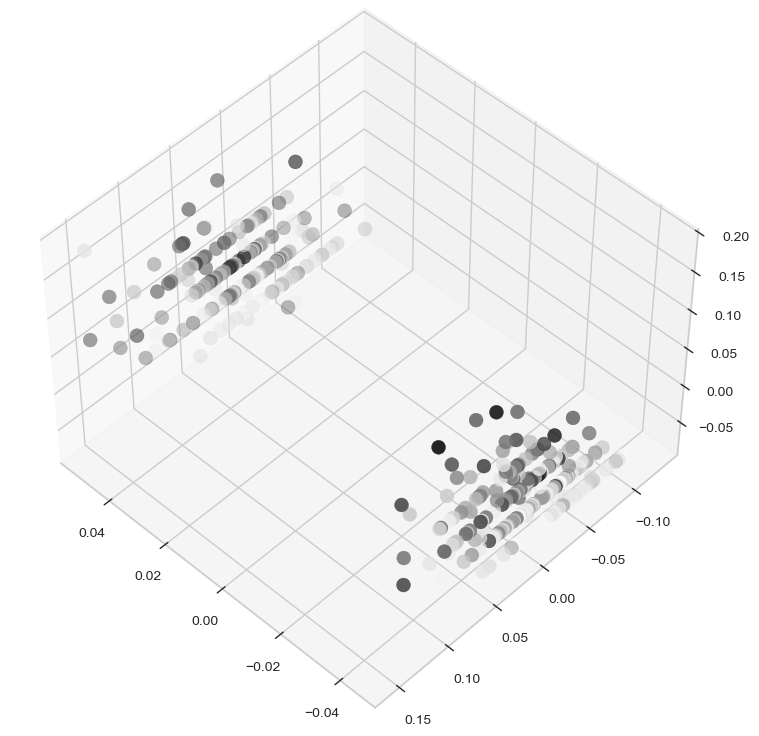

In [39]:
#Plot the reduced diabetes dataset
fig = plt.figure(1, figsize=(8, 7))
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])
ax.scatter(X_reduced_for[:, 0], X_reduced_for[:, 1], X_reduced_for[:, 2], c=y_diabetes, s=100)
plt.show()

## Aplicando con *backward*

In [40]:
#Perform BACKWARD feature selection over the diabetes dataset to reduce it to 3 dimensions
sfs_backward = SequentialFeatureSelector(clf, n_features_to_select=3, direction="backward")
sfs_backward_fitted = sfs_backward.fit(X_diabetes, y_diabetes)

X_reduced_back = sfs_backward_fitted.transform(X_diabetes)
print(X_reduced_back.shape)
print(sfs_backward_fitted.get_support())
print("Atributos elegidos")
print(atribs[sfs_backward_fitted.get_support()])

(442, 3)
[False False  True  True  True False False False False False]
Atributos elegidos
['bmi' 'bp' 's1']


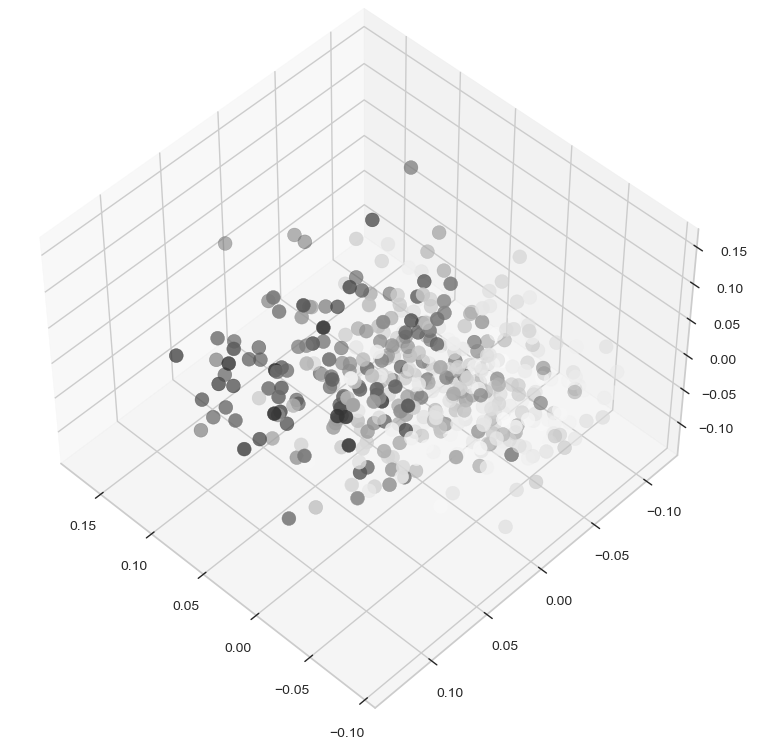

In [41]:
fig = plt.figure(1, figsize=(8, 7))
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])
ax.scatter(X_reduced_back[:, 0], X_reduced_back[:, 1], X_reduced_back[:, 2], c=y_diabetes, s=100)
plt.show()

## MIFS

Vamos a usar el cálculo de la información mutua del propio scikit learn.

In [42]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest


# Seleccionar las 3 características con mayor información mutua
selector = SelectKBest(mutual_info_classif, k=3)
X_selected = selector.fit_transform(X_iris, y_iris)

# Mostrar los resultados
selected_features = selector.get_support(indices=True)
feature_names = datasets.load_iris().feature_names
selected_feature_names = [feature_names[i] for i in selected_features]

print("Características seleccionadas:", selected_feature_names)
print("Datos reducidos:\n", X_selected)

Características seleccionadas: ['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']
Datos reducidos:
 [[5.1 1.4 0.2]
 [4.9 1.4 0.2]
 [4.7 1.3 0.2]
 [4.6 1.5 0.2]
 [5.  1.4 0.2]
 [5.4 1.7 0.4]
 [4.6 1.4 0.3]
 [5.  1.5 0.2]
 [4.4 1.4 0.2]
 [4.9 1.5 0.1]
 [5.4 1.5 0.2]
 [4.8 1.6 0.2]
 [4.8 1.4 0.1]
 [4.3 1.1 0.1]
 [5.8 1.2 0.2]
 [5.7 1.5 0.4]
 [5.4 1.3 0.4]
 [5.1 1.4 0.3]
 [5.7 1.7 0.3]
 [5.1 1.5 0.3]
 [5.4 1.7 0.2]
 [5.1 1.5 0.4]
 [4.6 1.  0.2]
 [5.1 1.7 0.5]
 [4.8 1.9 0.2]
 [5.  1.6 0.2]
 [5.  1.6 0.4]
 [5.2 1.5 0.2]
 [5.2 1.4 0.2]
 [4.7 1.6 0.2]
 [4.8 1.6 0.2]
 [5.4 1.5 0.4]
 [5.2 1.5 0.1]
 [5.5 1.4 0.2]
 [4.9 1.5 0.2]
 [5.  1.2 0.2]
 [5.5 1.3 0.2]
 [4.9 1.4 0.1]
 [4.4 1.3 0.2]
 [5.1 1.5 0.2]
 [5.  1.3 0.3]
 [4.5 1.3 0.3]
 [4.4 1.3 0.2]
 [5.  1.6 0.6]
 [5.1 1.9 0.4]
 [4.8 1.4 0.3]
 [5.1 1.6 0.2]
 [4.6 1.4 0.2]
 [5.3 1.5 0.2]
 [5.  1.4 0.2]
 [7.  4.7 1.4]
 [6.4 4.5 1.5]
 [6.9 4.9 1.5]
 [5.5 4.  1.3]
 [6.5 4.6 1.5]
 [5.7 4.5 1.3]
 [6.3 4.7 1.6]
 [4.9 3.3 1. ]
 [6.6 4.6 1.3]
 [5

## MRMR (Minimum Redundancy Maximum Relevance)

In [44]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.datasets import load_iris

X_iris, y_iris = datasets.load_iris(return_X_y=True)

n_features_to_select = 3  # Número de características que quieres seleccionar --> MRMR da un ranking de características y nosotros seleccionamos las primeras n_features_to_select

# Calcular la información mutua entre cada característica y la variable objetivo (relevancia)
mi = mutual_info_classif(X_iris, y_iris)

# Inicializar lista de características seleccionadas
selected_features = []
remaining_features = list(range(X_iris.shape[1]))

# Seleccionar la primera característica con mayor relevancia (máxima información mutua)
first_feature = np.argmax(mi)
selected_features.append(first_feature)
remaining_features.remove(first_feature)

# Iterativamente seleccionar características usando el criterio MRMR
for _ in range(n_features_to_select - 1):
    mrmr_scores = []
    for feature in remaining_features:
        # Calcular la relevancia (información mutua con la variable objetivo)
        relevance = mi[feature]
        
        # Calcular la redundancia (información mutua con características ya seleccionadas)
        redundancy = np.mean([mutual_info_regression(X_iris[:, [feature]], X_iris[:, [sf]])[0] for sf in selected_features])
        
        # MRMR = relevancia - redundancia
        mrmr_score = relevance - redundancy
        mrmr_scores.append((mrmr_score, feature))
    
    # Seleccionar la característica con el puntaje MRMR más alto
    best_feature = max(mrmr_scores, key=lambda x: x[0])[1]
    selected_features.append(best_feature)
    remaining_features.remove(best_feature)

# Mostrar las características seleccionadas
feature_names = load_iris().feature_names
selected_feature_names = [feature_names[i] for i in selected_features]
print("Características seleccionadas usando MRMR:", selected_feature_names)

Características seleccionadas usando MRMR: ['petal length (cm)', 'sepal width (cm)', 'petal width (cm)']


## Usar RandomForest para estimar la importancia de las características

La selección de características con un Random Forest se basa en la importancia de cada característica en la construcción del modelo. Los modelos de bosque aleatorio asignan una medida de importancia a cada característica basada en la reducción de impureza (como la reducción de la impureza de Gini o la ganancia de información) cada vez que una característica se utiliza en un nodo de división en los árboles.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris


# Cargar el conjunto de datos
feature_names = load_iris().feature_names

# Entrenar el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_iris, y_iris)

# Obtener la importancia de las características
importances = rf.feature_importances_

# Crear un DataFrame con las importancias y ordenar
feature_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print("Importancia de características:")
print(feature_importances)

Importancia de características:
             feature  importance
3   petal width (cm)    0.449599
2  petal length (cm)    0.426704
0  sepal length (cm)    0.096606
1   sepal width (cm)    0.027092


Podemos usar la clase `SelectFromModel` para aplicar directamente este criterio para seleccionar los atributos

In [ ]:

model = SelectFromModel(rf, prefit=True)
X_iris_rf = model.transform(X_iris)
X_iris_rf.shape               

(150, 2)

# Ejercicios

## Ejercicios de dimensionalidad

Vamos a usar el datasets de los pingüinos:

In [ ]:
penguins = sns.load_dataset("penguins")

1. Reduce usando PCA o el cluster agglomerativo la dimensionalidad de los
   valores numéricos del problema en 2 componentes. Nota: Es cómodo usar el
   atributo **select_dtypes** de pandas para filtrar atributos de tipo
   np.number.

2. Visualiza la representación, resaltando la especie. ¿Es separable en dos?

## Ejercicios de selección de características

Vamos a usar aquí el dataset de estudiantes.

In [ ]:
students = pd.read_csv("estudiantes.csv")

Target es el valor con el que se quiere predecir, que indica si los estudiantes
terminan la carrera o no.

1. Elimina directamente los atributos con valores perdidos, y usa StandardScaler
   sobre el resto.

2. Separa el atributo Target en otra variable.

2. Visualizar la importancia de las características.

3. Carga el estimador

In [ ]:
from sklearn import svm
lsvc = svm.LinearSVC(C=0.01, penalty="l1", dual=False)

4. Usando SelectModel con ese estimador eliminar el 20% de los atributos.

5. Usa SequentialFeatureSelector con ese estimador para eliminar el 20% de los
   atributos en ambas direcciones, ¿cuáles son eliminados?

6. ¿Son iguales en ambas direcciones?
